# Análasis de datos de Ajedrez

In [1]:
import os

In [2]:
from tqdm import tqdm

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import chess.pgn

In [5]:
import pandas as pd
import numpy as np

## Importación y tratamiento de datos

In [6]:
FILE_PATH = 'C:/Users/mated/Documents/GitHub/CHESS_DATA/lichess_db_standard_rated_2013-01.pgn'

In [7]:
pgn_file = open(FILE_PATH)
game_list = []

total_games = sum(1 for _ in pgn_file)
pgn_file.seek(0)  # Rebobinar el archivo para el ciclo while

count = 0
with tqdm(total=total_games, desc="Procesando partidas") as pbar:
    while True:
    # while count < int(total_games / 10):
        count += 1
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break
        game_list.append(game)
        pbar.update(1)

Procesando partidas:   6%|▌         | 121332/2183562 [04:41<1:19:40, 431.36it/s]


In [8]:
def get_winner(result):
    if result == "1-0":
        return "white"
    elif result == "0-1":
        return "black"
    else:
        return "draw"

In [9]:
def extract_game_info(game):
    info = {}
    info["event"] = game.headers["Event"]
    info["site"] = game.headers["Site"]
    info["date"] = game.headers["Date"]
    info["white"] = game.headers["White"]
    info["black"] = game.headers["Black"]
    info["white_elo"] = game.headers.get("WhiteElo")
    info["black_elo"] = game.headers.get("BlackElo")
    info["result"] = game.headers["Result"]
    info["eco"] = game.headers.get("ECO")
    info["opening_name"] = game.headers.get("Opening")
    info["time_control"] = game.headers.get("TimeControl")
    info["termination"] = game.headers.get("Termination")
    info["moves"] = game.mainline_moves()
    info["num_moves"] = len(list(game.mainline_moves()))
    info["winner"] = get_winner(info["result"])
    info["rating_diff"] = (int(game.headers.get("WhiteRatingDiff", 0)),
                           int(game.headers.get("BlackRatingDiff", 0)))
    return info


In [10]:
game_info_list = [extract_game_info(game) for game in game_list]
df = pd.DataFrame.from_dict(game_info_list)

In [11]:
df['white_elo'] = pd.to_numeric(df['white_elo'], errors='coerce').astype('Int64')
df['black_elo'] = pd.to_numeric(df['black_elo'], errors='coerce').astype('Int64')

In [12]:
df.dropna(inplace=True)

## Análisis de Datos

In [13]:
df.tail()

,event,site,date,white,black,white_elo,black_elo,result,eco,opening_name,time_control,termination,moves,num_moves,winner,rating_diff
121327,Rated Classical game,https://lichess.org/4w6vfr19,????.??.??,Yudhisthira,netsah08,1854,1937,0-1,E80,King's Indian Defense: Saemisch Variation,600+10,Normal,1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. f3 N...,76,black,"(-9, 16)"
121328,Rated Classical game,https://lichess.org/33p7nthu,????.??.??,Daler,kualalumpur,1500,1266,0-1,B01,Scandinavian Defense,720+0,Time forfeit,1. e4 d5 2. d3 dxe4 3. dxe4 Qxd1+ 4. Kxd1 Nc6 ...,42,black,"(-331, 12)"
121329,Rated Classical game,https://lichess.org/pzncnhrt,????.??.??,senip,Richard_XII,1431,1523,0-1,B01,Scandinavian Defense: Mieses-Kotroc Variation,960+6,Normal,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qd8 4. Nf3 Nc6 5....,102,black,"(-70, 7)"
121330,Rated Blitz game,https://lichess.org/hhwb2whr,????.??.??,van9,shueardm,1693,1479,1-0,B00,Barnes Defense,180+1,Normal,1. e4 f6 2. Bc4 e6 3. d4 Qe7 4. Nc3 Nc6 5. d5 ...,43,white,"(6, -5)"
121331,Rated Blitz game,https://lichess.org/e4gb7ja6,????.??.??,pablotorre,Tortfeasor,1744,1762,0-1,B15,Caro-Kann Defense: Forgacs Variation,300+0,Time forfeit,1. e4 c6 2. d4 d5 3. Nc3 dxe4 4. Nxe4 Nf6 5. N...,128,black,"(-10, 19)"


Análisis de frecuencia de aperturas: se puede contar cuántas veces se han jugado cada una de las aperturas más comunes (por ejemplo, las 10 más comunes)

In [14]:
openings = df["moves"].apply(lambda moves: str(moves)[:10])
top_openings = openings.value_counts().head(10)

Análisis de rendimiento por color: se puede calcular el porcentaje de partidas ganadas, perdidas y empatadas por cada color.

In [15]:
white_stats = df[df["winner"] == "white"]["result"].value_counts(normalize=True)
black_stats = df[df["winner"] == "black"]["result"].value_counts(normalize=True)

Análisis de duración de las partidas: se puede calcular la duración promedio de las partidas, así como la distribución de duraciones.

In [16]:
# df["duration"] = df["moves"].apply(lambda moves: len(moves))
# mean_duration = df["duration"].mean()
# duration_distribution = df["duration"].value_counts().sort_index()

Histograma de duración de las partidas

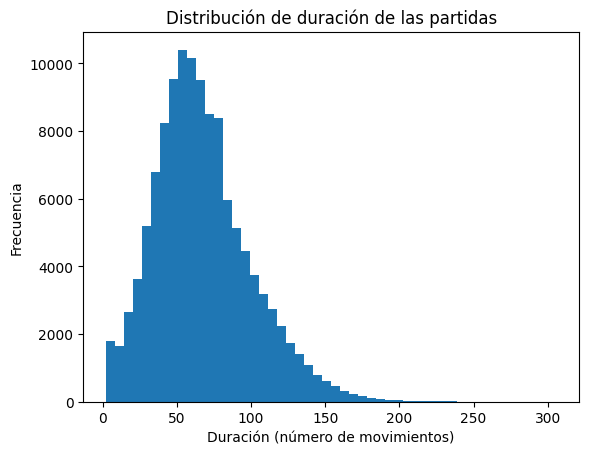

In [17]:
plt.hist(df["num_moves"], bins=50)
plt.xlabel("Duración (número de movimientos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de duración de las partidas")
plt.show()

Gráfico de barras de frecuencia de aperturas

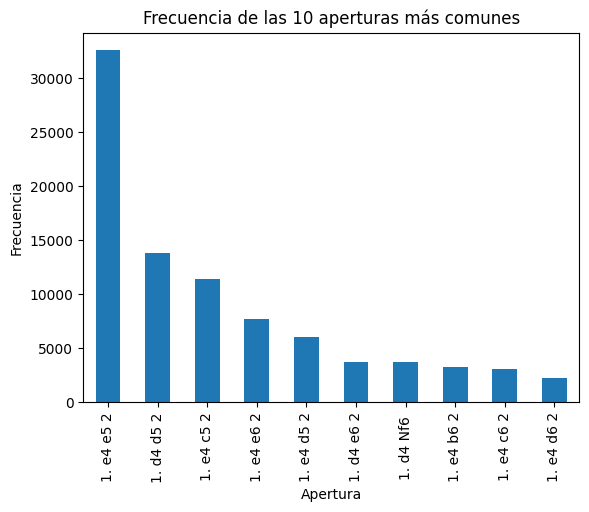

In [18]:
top_openings.plot(kind="bar")
plt.xlabel("Apertura")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de las 10 aperturas más comunes")
plt.show()

Gráfico de torta de resultados

In [19]:
# result_counts = df["result"].value_counts()
# labels = ["Empate", "Blancas ganan", "Negras ganan"]
# values = result_counts.values[:3]
# sum_other = sum(result_counts.values[3:])
# values = values + [sum_other]
# plt.pie(values, labels=labels, autopct='%1.1f%%')
# plt.title("Proporción de resultados en la base de datos")
# plt.show()

Gráfico de dispersión de número de movimientos vs. resultado

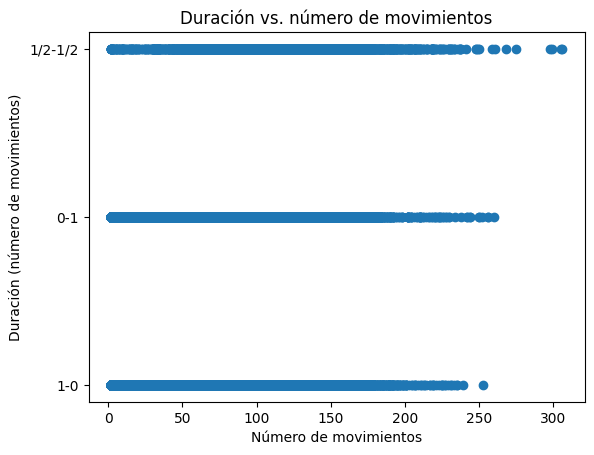

In [20]:
plt.scatter(df["num_moves"], df["result"])
plt.xlabel("Número de movimientos")
plt.ylabel("Duración (número de movimientos)")
plt.title("Duración vs. número de movimientos")
plt.show()

Gráfico de cajas y bigotes de duración

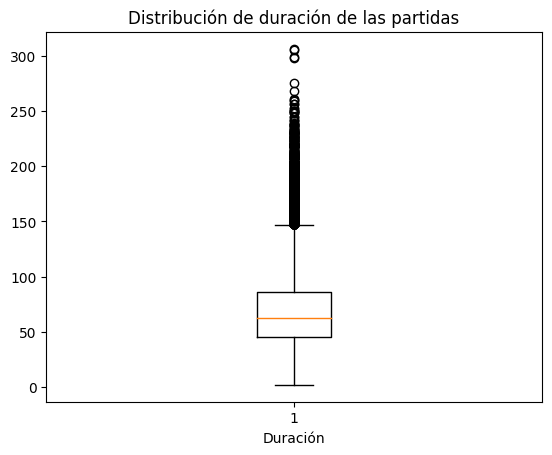

In [21]:
plt.boxplot(df["num_moves"])
plt.xlabel("Duración")
plt.title("Distribución de duración de las partidas")
plt.show()

Gráfico de barras de número de movimientos

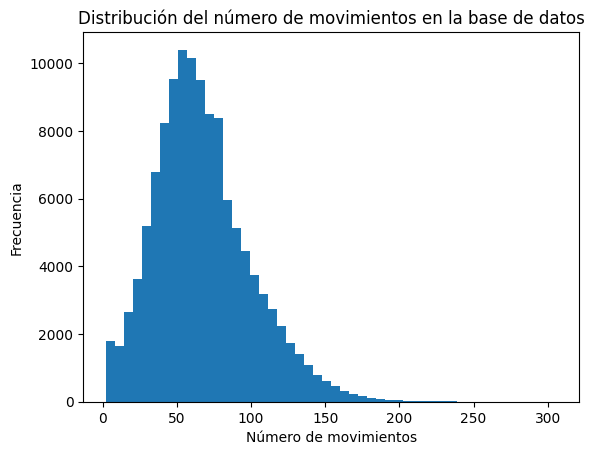

In [22]:
plt.hist(df["num_moves"], bins=50)
plt.xlabel("Número de movimientos")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de movimientos en la base de datos")
plt.show()

Gráfico de dispersión de duración vs. resultado

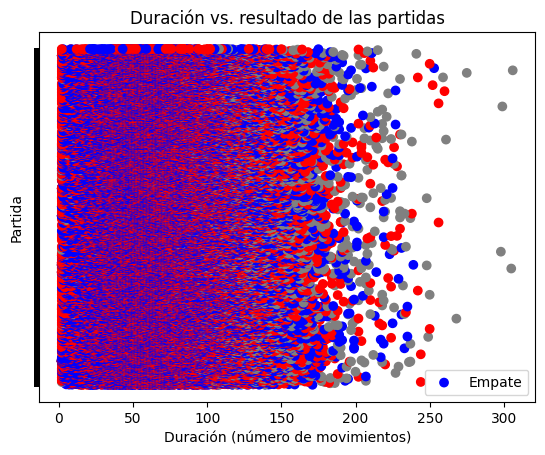

In [23]:
colors = {"draw": "gray", "white": "blue", "black": "red"}
plt.scatter(df["num_moves"], range(len(df)), c=df["winner"].apply(lambda winner: colors[winner]))
plt.yticks(range(len(df)), [])
plt.xlabel("Duración (número de movimientos)")
plt.ylabel("Partida")
plt.title("Duración vs. resultado de las partidas")
plt.legend(["Empate", "Blancas ganan", "Negras ganan"])
plt.show()

Gráfico de dispersión de rating blanco vs. rating negro

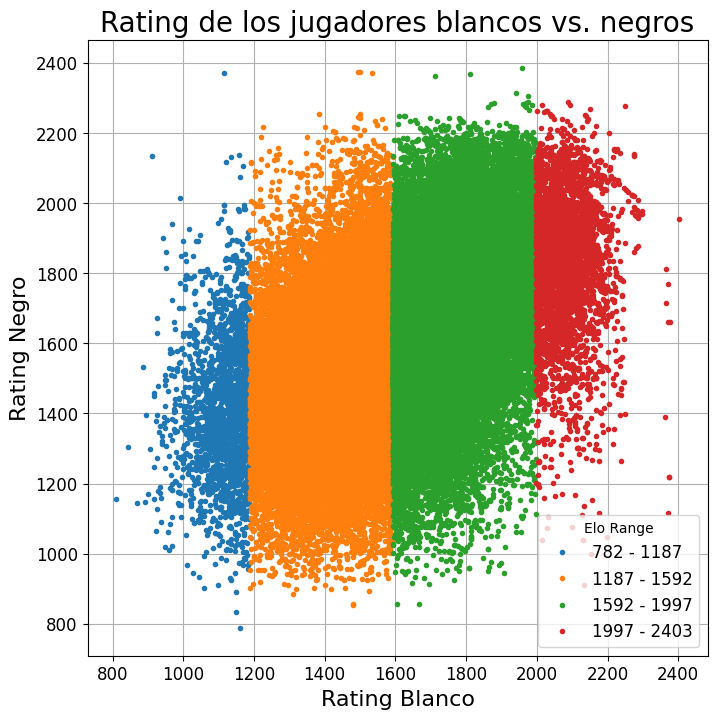

In [24]:
elo_max = np.amax([df['white_elo'], df['black_elo']])
elo_min = np.amin([df['white_elo'], df['black_elo']])

bins = np.linspace(elo_min, elo_max, 5)
labels = [f'{int(bins[i])} - {int(bins[i+1])}' for i in range(len(bins)-1)]

df['elo_range'] = pd.cut(df['white_elo'], bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(8,8))

for label, group in df.groupby('elo_range'):
    ax.plot(group['white_elo'], group['black_elo'], marker='.', linestyle='', label=label)

ax.legend(title='Elo Range', loc='best', fontsize=12)
ax.set_title("Rating de los jugadores blancos vs. negros", fontsize=20)
ax.set_xlabel('Rating Blanco', fontsize=16)
ax.set_ylabel('Rating Negro', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)
plt.show()


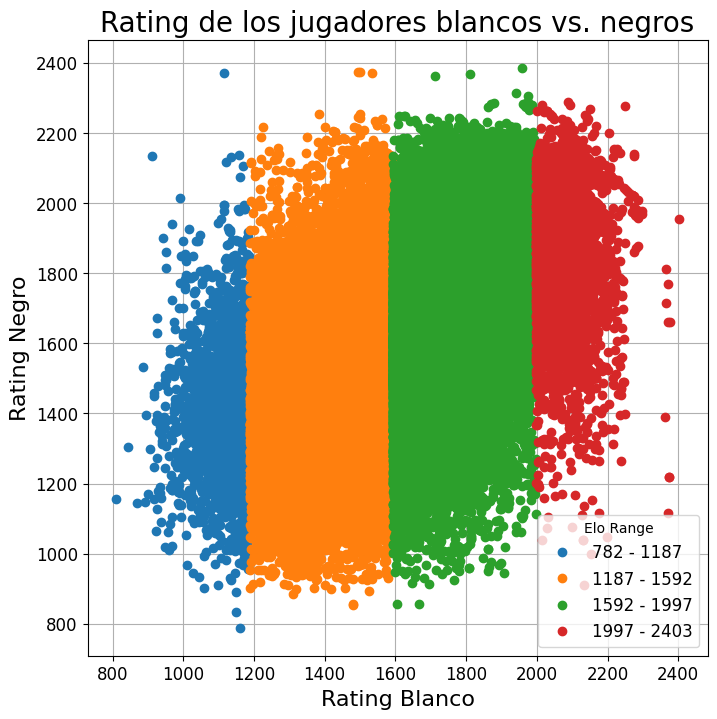

In [25]:
elo_max = np.max([df['white_elo'], df['black_elo']])
elo_min = np.min([df['white_elo'], df['black_elo']])

df['elo_max'] = elo_max

bins = np.linspace(elo_min, elo_max, 5)
labels = [f'{int(bins[i])} - {int(bins[i+1])}' for i in range(len(bins)-1)]

df['elo_range'] = pd.cut(df['white_elo'], bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(8,8))

for label, group in df.groupby('elo_range'):
    ax.plot(group['white_elo'], group['black_elo'], marker='o', linestyle='', label=label)

ax.legend(title='Elo Range', loc='best', fontsize=12)
ax.set_title("Rating de los jugadores blancos vs. negros", fontsize=20)
ax.set_xlabel('Rating Blanco', fontsize=16)
ax.set_ylabel('Rating Negro', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)
plt.show()

Gráfico de barras de frecuencia de resultados por rango de rating

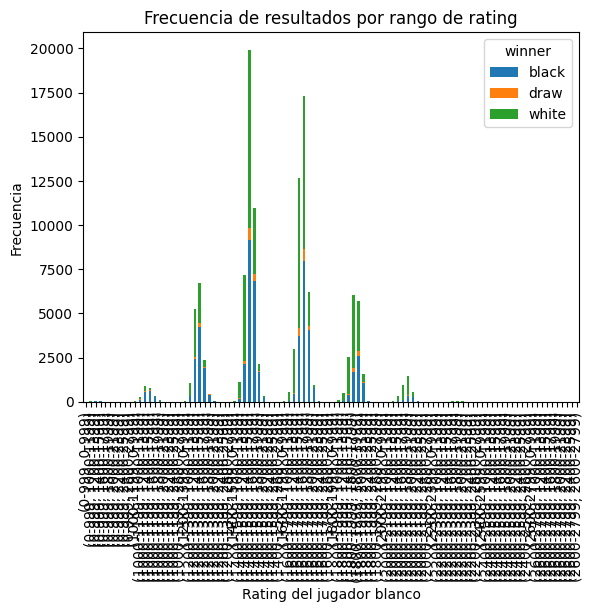

In [26]:
bins = [0, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800]
labels = [f"{bins[i-1]}-{bins[i]-1}" for i in range(1, len(bins))]
df["white_rating_bin"] = pd.cut(df["white_elo"], bins=bins, labels=labels)
df["black_rating_bin"] = pd.cut(df["black_elo"], bins=bins, labels=labels)

result_counts = df.groupby(["white_rating_bin", "black_rating_bin", "winner"]).size().unstack().fillna(0)
result_counts.plot(kind="bar", stacked=True)
plt.xlabel("Rating del jugador blanco")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de resultados por rango de rating")
plt.show()

Gráfico de cajas y bigotes de duración de partidas por rango de rating

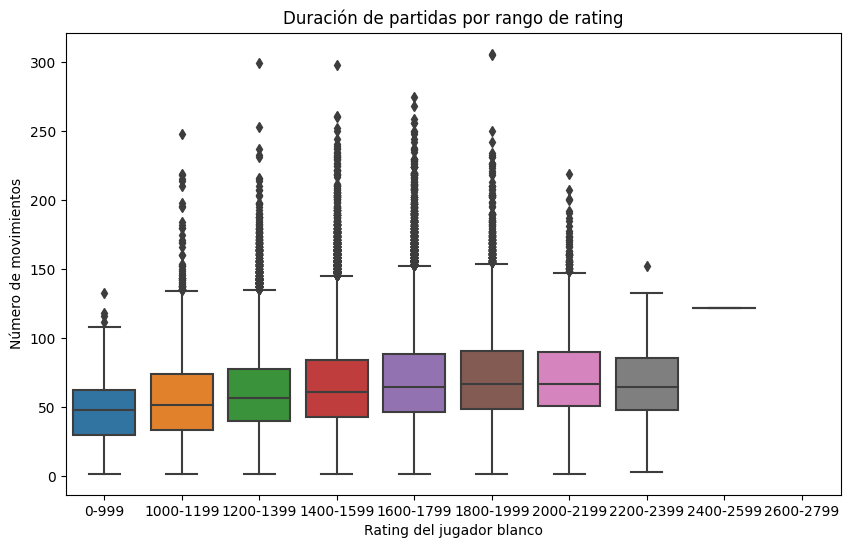

In [27]:
df["rating_bin"] = pd.cut(df["white_elo"], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x="rating_bin", y="num_moves", data=df)
plt.xlabel("Rating del jugador blanco")
plt.ylabel("Número de movimientos")
plt.title("Duración de partidas por rango de rating")
plt.show()

Gráfico de barras de frecuencia de aperturas por rango de rating

In [28]:
# def get_top_openings(df, rating_bin):
#     openings = {}
#     for moves in df[df["rating_bin"] == rating_bin]["moves"]:
#         if len(moves) > 0:
#             variations = moves.mainline().variations
#             if len(variations) > 0:
#                 first_move = variations[0][0].move
#                 opening = str(first_move)[:2]
#                 if opening not in openings:
#                     openings[opening] = 0
#                 openings[opening] += 1
#     return pd.Series(openings)


In [29]:
# top_openings = pd.concat([get_top_openings(df, rating_bin) for rating_bin in labels], axis=1)
# top_openings.columns = labels
# top_openings = top_openings.fillna(0).astype(int).T
# top_openings = top_openings[["d4", "e4", "c4", "Nf3", "g3", "b3", "f4", "a3", "h3"]]
# top_openings.plot(kind="bar", stacked=True)
# plt.xlabel("Rating del jugador blanco")
# plt.ylabel("Frecuencia")
# plt.title("Frecuencia de aperturas por rango de rating")
# plt.show()

Gráfico de línea de evolución del rating de un jugador a lo largo del tiempo

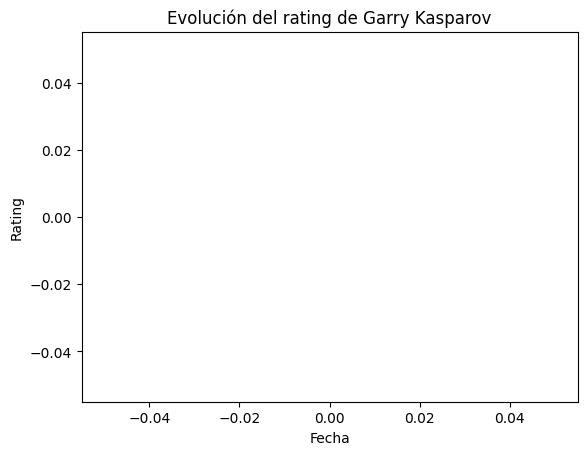

In [30]:
player = "Garry Kasparov"
player_df = df[(df["white"] == player) | (df["black"] == player)].sort_values("date")
player_rating = []
for index, row in player_df.iterrows():
    if row["white"] == player:
        player_rating.append(int(row["white_elo"]))
    else:
        player_rating.append(int(row["black_elo"]))

plt.plot(player_df["date"], player_rating)
plt.xlabel("Fecha")
plt.ylabel("Rating")
plt.title(f"Evolución del rating de {player}")
plt.show()

Análisis de ratings y duración de partidas

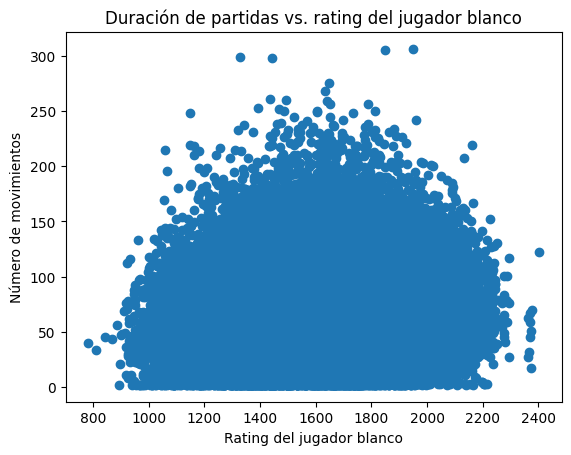

In [31]:
plt.scatter(df["white_elo"], df["num_moves"])
plt.xlabel("Rating del jugador blanco")
plt.ylabel("Número de movimientos")
plt.title("Duración de partidas vs. rating del jugador blanco")
plt.show()

Análisis de frecuencia de resultados por rating

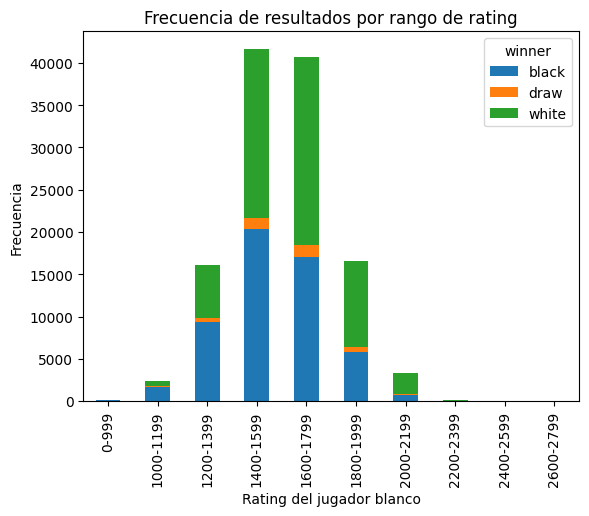

In [32]:
result_counts = df.groupby(["white_rating_bin", "winner"]).size().unstack().fillna(0)
result_counts.plot(kind="bar", stacked=True)
plt.xlabel("Rating del jugador blanco")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de resultados por rango de rating")
plt.show()

Análisis de frecuencia de aperturas por rating

In [33]:
# def get_top_openings(df, rating_bin):
#     openings = {}
#     for moves in df[df["white_rating_bin"] == rating_bin]["moves"]:
#         opening = moves[0].uci()[:2]
#         if opening not in openings:
#             openings[opening] = 0
#         openings[opening] += 1
#     return pd.Series(openings)

In [34]:
# top_openings = pd.concat([get_top_openings(df, rating_bin) for rating_bin in labels], axis=1)
# top_openings.columns = labels
# top_openings = top_openings.fillna(0).astype(int).T
# top_openings = top_openings[["d4", "e4", "c4", "Nf3", "g3", "b3", "f4", "a3", "h3"]]
# top_openings.plot(kind="bar", stacked=True)
# plt.xlabel("Rating del jugador blanco")
# plt.ylabel("Frecuencia")
# plt.title("Frecuencia de aperturas por rango de rating")
# plt.show()

Análisis de frecuencia de finales por rating

In [35]:
# def get_endgame(df, rating_bin):
#     endgames = {}
#     for moves in df[df["white_rating_bin"] == rating_bin]["moves"]:
#         last_move = moves[-1].uci()
#         if "x" in last_move:
#             piece = last_move[0]
#             square = last_move[2:4]
#             endgame = f"{piece}{square}"
#             if endgame not in endgames:
#                 endgames[endgame] = 0
#             endgames[endgame] += 1
#     return pd.Series(endgames)

In [36]:
# top_endgames = pd.concat([get_endgame(df, rating_bin) for rating_bin in labels], axis=1)
# top_endgames.columns = labels
# top_endgames = top_endgames.fillna(0).astype(int).T
# top_endgames = top_endgames[["Kg1", "Kg8", "Kf1", "Kf8", "Nf3", "Nf6", "d4", "d5", "e4", "e5", "c4", "c5"]]
# top_endgames.plot(kind="bar", stacked=True)
# plt.xlabel("Rating del jugador blanco")
# plt.ylabel("Frecuencia")
# plt.title("Frecuencia de finales por rango de rating")
# plt.show()

Análisis de aperturas más efectivas por rating

In [37]:
# def get_opening_results(df, rating_bin):
#     opening_results = {}
#     for index, row in df[df["white_rating_bin"] == rating_bin].iterrows():
#         opening = row["moves"][0].uci()[:2]
#         result = row["result"]
#         if opening not in opening_results:
#             opening_results[opening] = {"total": 0, "wins": 0, "draws": 0, "losses": 0}
#         opening_results[opening]["total"] += 1
#         if result == "1-0":
#             opening_results[opening]["wins"] += 1
#         elif result == "1/2-1/2":
#             opening_results[opening]["draws"] += 1
#         else:
#             opening_results[opening]["losses"] += 1
#     opening_results_df = pd.DataFrame.from_dict(opening_results, orient="index")
#     opening_results_df["win_pct"] = opening_results_df["wins"] / opening_results_df["total"]
#     opening_results_df["draw_pct"] = opening_results_df["draws"] / opening_results_df["total"]
#     opening_results_df["loss_pct"] = opening_results_df["losses"] / opening_results_df["total"]
#     opening_results_df = opening_results_df[["win_pct", "draw_pct", "loss_pct"]]
#     return opening_results

In [38]:
# for rating_bin in labels:
#     opening_results_df = get_opening_results(df, rating_bin)
#     opening_results_df.plot(kind="bar", stacked=True)
#     plt.xlabel(f"Aperturas para jugadores blancos en el rango de rating {rating_bin}")
#     plt.ylabel("Proporción de partidas")
#     plt.title("Aperturas más efectivas por rango de rating")
#     plt.show()